# Exploratory Data Analysis (EDA) and Feature Engineering
# HAM10000 Skin Lesion Dataset

This notebook performs comprehensive exploratory data analysis on the HAM10000 metadata dataset to understand:
- Dataset structure and basic statistics
- Class distribution and imbalance
- Feature relationships and correlations
- Age and gender distributions across different skin conditions
- Data quality issues and missing values

## Dataset Overview
The HAM10000 dataset contains dermatoscopic images of skin lesions with the following features:
- **lesion_id**: Unique identifier for each lesion
- **image_id**: Unique identifier for each image
- **dx**: Diagnosis (target variable) - type of skin condition
- **dx_type**: Diagnosis confirmation method
- **age**: Patient age
- **sex**: Patient gender
- **localization**: Body location of the lesion

In [1]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")
print("Versions:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")

Libraries imported successfully!
Versions:
NumPy: 2.2.6
Pandas: 2.3.1
Matplotlib: 3.10.3
Seaborn: 0.13.2


In [2]:
# Step 2: Load the Dataset
data_path = '../Dataset/HAM10000_metadata.csv'
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Dataset shape: (10015, 7)
Memory usage: 3.78 MB


## Step 3: Basic Dataset Information

In [3]:
# Display first 10 rows
print("First 10 rows of the dataset:")
print("="*50)
display(df.head(10))

print("\n" + "="*50)
print("Dataset Info:")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nData Types:")
print(df.dtypes)

print("\n" + "="*50)
print("Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})
display(missing_df)

First 10 rows of the dataset:


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back



Dataset Info:
Shape: (10015, 7)
Columns: ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

Data Types:
lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

Missing Values:


,Column,Missing Count,Missing Percentage
0,lesion_id,0,0.000000
1,image_id,0,0.000000
2,dx,0,0.000000
3,dx_type,0,0.000000
4,age,57,0.569146
5,sex,0,0.000000
6,localization,0,0.000000


## Step 4: Handle Missing Values

In [4]:
# Check for missing values and handle them
print("Before handling missing values:")
print(f"Total missing values: {df.isnull().sum().sum()}")
print("\nMissing values by column:")
print(df.isnull().sum())

# Handle missing values in age column (if any)
if df['age'].isnull().sum() > 0:
    print(f"\nAge column has {df['age'].isnull().sum()} missing values")
    # Fill missing ages with median age
    median_age = df['age'].median()
    df['age'].fillna(median_age, inplace=True)
    print(f"Filled missing ages with median age: {median_age}")

# Handle missing values in other columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            # Fill categorical variables with mode
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Filled missing values in {col} with mode: {mode_value}")

print(f"\nAfter handling missing values:")
print(f"Total missing values: {df.isnull().sum().sum()}")
print("Dataset is now clean!")

Before handling missing values:
Total missing values: 57

Missing values by column:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Age column has 57 missing values
Filled missing ages with median age: 50.0

After handling missing values:
Total missing values: 0
Dataset is now clean!


## Step 5: Descriptive Statistics

In [5]:
# Descriptive statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print("="*60)
display(df.describe())

# Descriptive statistics for categorical variables
print("\n" + "="*60)
print("Descriptive Statistics for Categorical Variables:")
print("="*60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df[col].nunique()}")
    print("Value counts:")
    print(df[col].value_counts())
    print("-" * 40)

# Age statistics
print("\n" + "="*60)
print("Age Statistics:")
print("="*60)
print(f"Mean age: {df['age'].mean():.2f} years")
print(f"Median age: {df['age'].median():.2f} years")
print(f"Standard deviation: {df['age'].std():.2f} years")
print(f"Min age: {df['age'].min():.0f} years")
print(f"Max age: {df['age'].max():.0f} years")
print(f"Age range: {df['age'].max() - df['age'].min():.0f} years")

Descriptive Statistics for Numerical Variables:


,age
count,10015.000000
mean,51.853220
std,16.920833
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000



Descriptive Statistics for Categorical Variables:

LESION_ID:
Unique values: 7470
Value counts:
lesion_id
HAM_0000835    6
HAM_0003789    6
HAM_0005263    6
HAM_0001863    6
HAM_0007427    5
              ..
HAM_0000408    1
HAM_0005597    1
HAM_0001152    1
HAM_0004462    1
HAM_0001036    1
Name: count, Length: 7470, dtype: int64
----------------------------------------

IMAGE_ID:
Unique values: 10015
Value counts:
image_id
ISIC_0032258    1
ISIC_0027419    1
ISIC_0025030    1
ISIC_0026769    1
ISIC_0025661    1
               ..
ISIC_0032129    1
ISIC_0029836    1
ISIC_0031029    1
ISIC_0025915    1
ISIC_0031326    1
Name: count, Length: 10015, dtype: int64
----------------------------------------

DX:
Unique values: 7
Value counts:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64
----------------------------------------

DX_TYPE:
Unique values: 4
Value counts:
dx_type
histo        5340
follow_up    3704
c

## Step 6: Target Variable Distribution (Disease Types)

Disease Type Distribution:



,Disease_Type,Count,Percentage,Disease_Name
0,nv,6705,66.949576,Melanocytic Nevi
1,mel,1113,11.113330,Melanoma
2,bkl,1099,10.973540,Benign Keratosis-like Lesions
3,bcc,514,5.132302,Basal Cell Carcinoma
4,akiec,327,3.265102,Actinic Keratoses
5,vasc,142,1.417873,Vascular Lesions
6,df,115,1.148278,Dermatofibroma


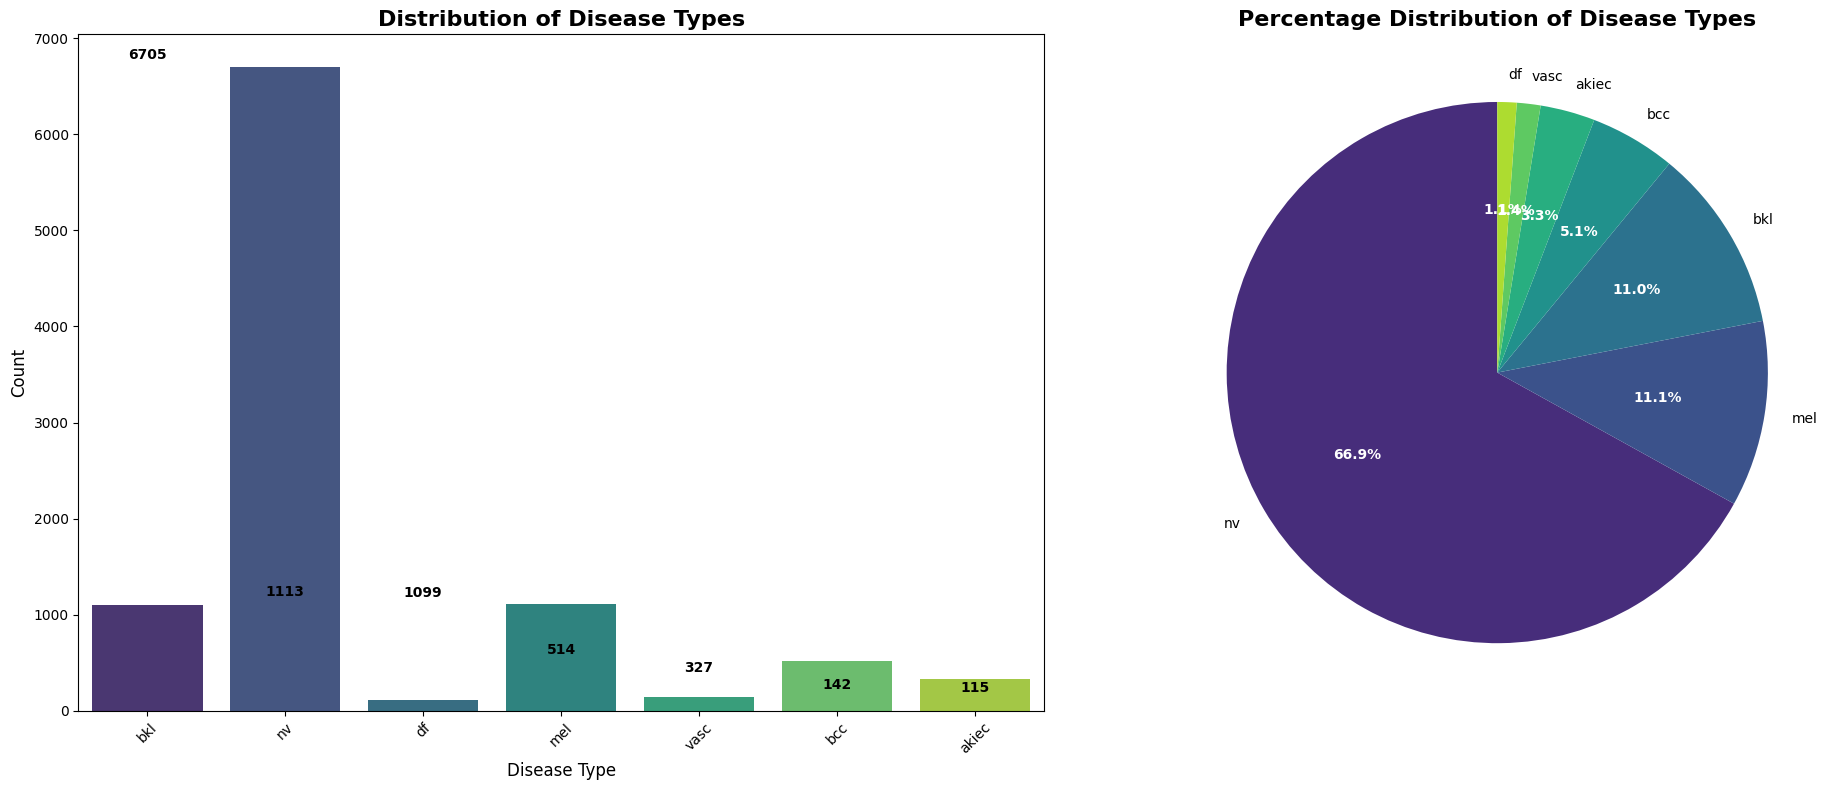


Total unique diseases: 7
Most common disease: nv (6705 cases)
Least common disease: df (115 cases)


In [6]:
# Disease type distribution
print("Disease Type Distribution:")
print("="*50)
dx_counts = df['dx'].value_counts()
dx_percentages = df['dx'].value_counts(normalize=True) * 100

dx_summary = pd.DataFrame({
    'Disease_Type': dx_counts.index,
    'Count': dx_counts.values,
    'Percentage': dx_percentages.values
})

# Map disease codes to full names for better understanding
disease_mapping = {
    'nv': 'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma'
}

dx_summary['Disease_Name'] = dx_summary['Disease_Type'].map(disease_mapping)
display(dx_summary)

# Plot distribution of target classes
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Count plot
sns.countplot(data=df, x='dx', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Disease Types', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Disease Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Add count labels on bars
for i, v in enumerate(dx_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = sns.color_palette('viridis', len(dx_counts))
wedges, texts, autotexts = axes[1].pie(dx_counts.values, labels=dx_counts.index, autopct='%1.1f%%', 
                                       colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution of Disease Types', fontsize=16, fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('../Results/disease_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal unique diseases: {df['dx'].nunique()}")
print(f"Most common disease: {dx_counts.index[0]} ({dx_counts.iloc[0]} cases)")
print(f"Least common disease: {dx_counts.index[-1]} ({dx_counts.iloc[-1]} cases)")

## Step 7: Class Imbalance Analysis

Class Imbalance Analysis:
Total samples: 10015
Majority class ('nv'): 6705 samples (66.9%)
Minority class ('df'): 115 samples (1.1%)
Imbalance ratio: 58.30:1


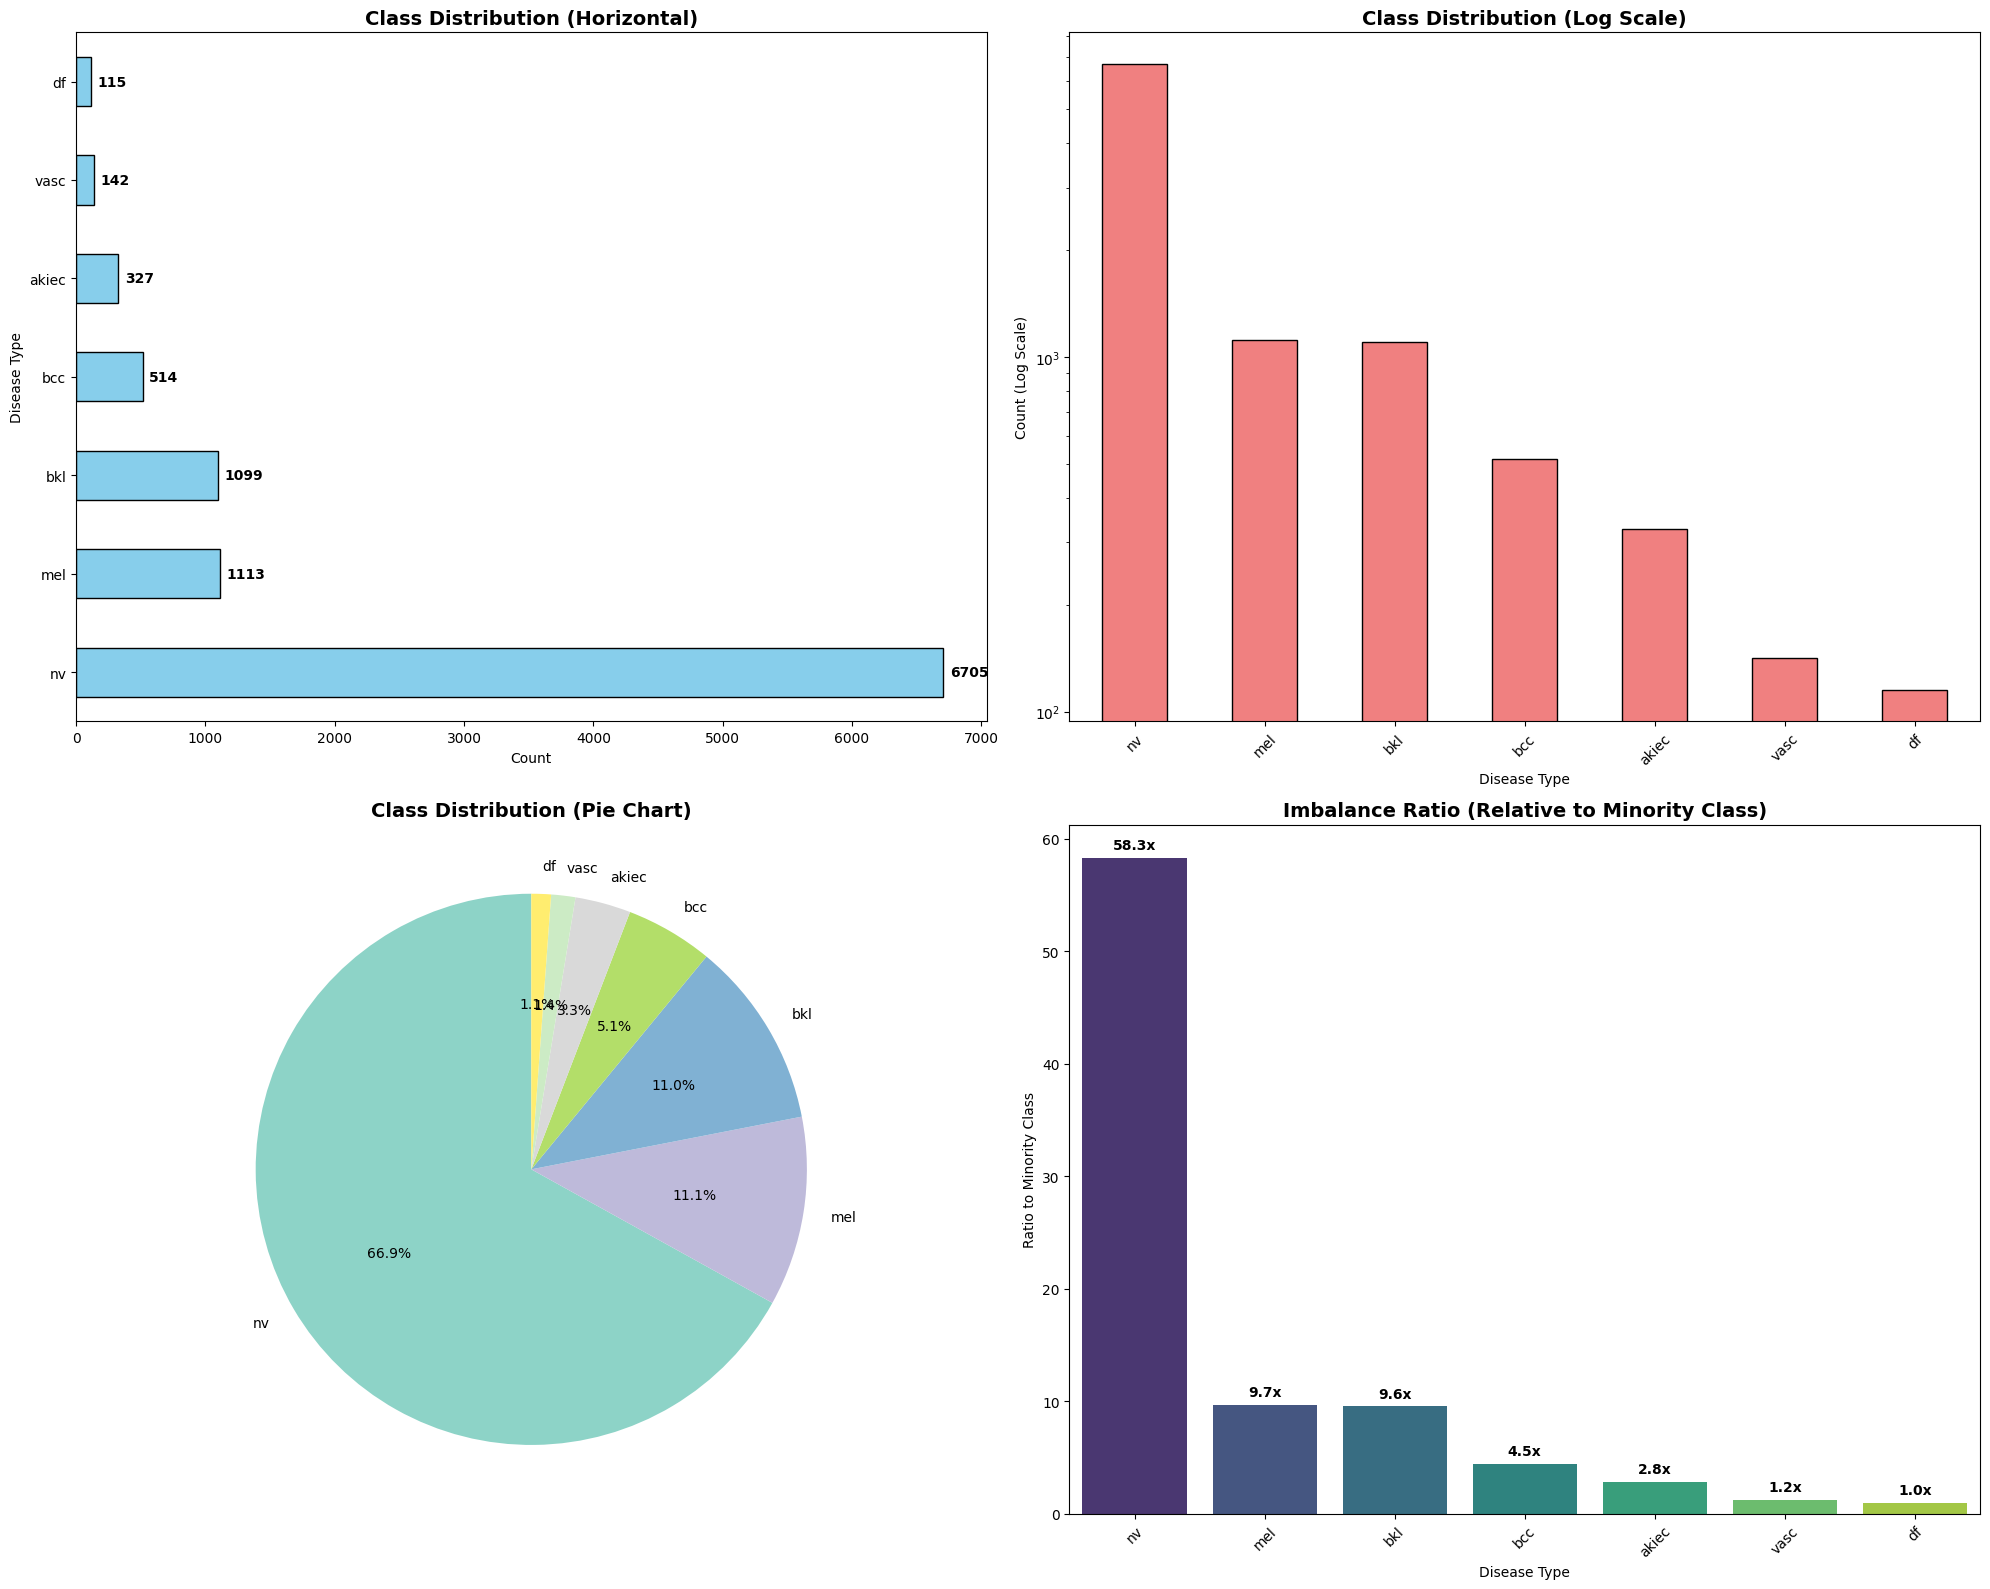


⚠️  HIGHLY IMBALANCED DATASET: Imbalance ratio of 58.30:1
   Consider using techniques like SMOTE, class weights, or stratified sampling.


In [7]:
# Analyze class imbalance
print("Class Imbalance Analysis:")
print("="*50)

dx_counts = df['dx'].value_counts()
total_samples = len(df)

# Calculate imbalance ratios
majority_class_count = dx_counts.iloc[0]
minority_class_count = dx_counts.iloc[-1]

imbalance_ratio = majority_class_count / minority_class_count

print(f"Total samples: {total_samples}")
print(f"Majority class ('{dx_counts.index[0]}'): {majority_class_count} samples ({dx_counts.iloc[0]/total_samples*100:.1f}%)")
print(f"Minority class ('{dx_counts.index[-1]}'): {minority_class_count} samples ({dx_counts.iloc[-1]/total_samples*100:.1f}%)")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

# Visualize class imbalance
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Horizontal bar plot for better readability
dx_counts.plot(kind='barh', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Class Distribution (Horizontal)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Count')
axes[0,0].set_ylabel('Disease Type')

# Add count labels
for i, v in enumerate(dx_counts.values):
    axes[0,0].text(v + 50, i, str(v), va='center', fontweight='bold')

# Logarithmic scale to better show imbalance
dx_counts.plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='black', logy=True)
axes[0,1].set_title('Class Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Disease Type')
axes[0,1].set_ylabel('Count (Log Scale)')
axes[0,1].tick_params(axis='x', rotation=45)

# Pie chart with percentage labels
colors = plt.cm.Set3(np.linspace(0, 1, len(dx_counts)))
wedges, texts, autotexts = axes[1,0].pie(dx_counts.values, labels=dx_counts.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90)
axes[1,0].set_title('Class Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Imbalance visualization
imbalance_data = pd.DataFrame({
    'Class': dx_counts.index,
    'Ratio_to_Minority': dx_counts.values / minority_class_count
})

sns.barplot(data=imbalance_data, x='Class', y='Ratio_to_Minority', ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Imbalance Ratio (Relative to Minority Class)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Disease Type')
axes[1,1].set_ylabel('Ratio to Minority Class')
axes[1,1].tick_params(axis='x', rotation=45)

# Add ratio labels
for i, v in enumerate(imbalance_data['Ratio_to_Minority']):
    axes[1,1].text(i, v + 0.5, f'{v:.1f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../Results/class_imbalance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Check if dataset is balanced
if imbalance_ratio > 10:
    print(f"\n⚠️  HIGHLY IMBALANCED DATASET: Imbalance ratio of {imbalance_ratio:.2f}:1")
    print("   Consider using techniques like SMOTE, class weights, or stratified sampling.")
elif imbalance_ratio > 3:
    print(f"\n⚠️  MODERATELY IMBALANCED DATASET: Imbalance ratio of {imbalance_ratio:.2f}:1")
    print("   Consider using class weights or stratified sampling.")
else:
    print(f"\n✅ RELATIVELY BALANCED DATASET: Imbalance ratio of {imbalance_ratio:.2f}:1")

## Step 8: Feature Correlations and Relationships

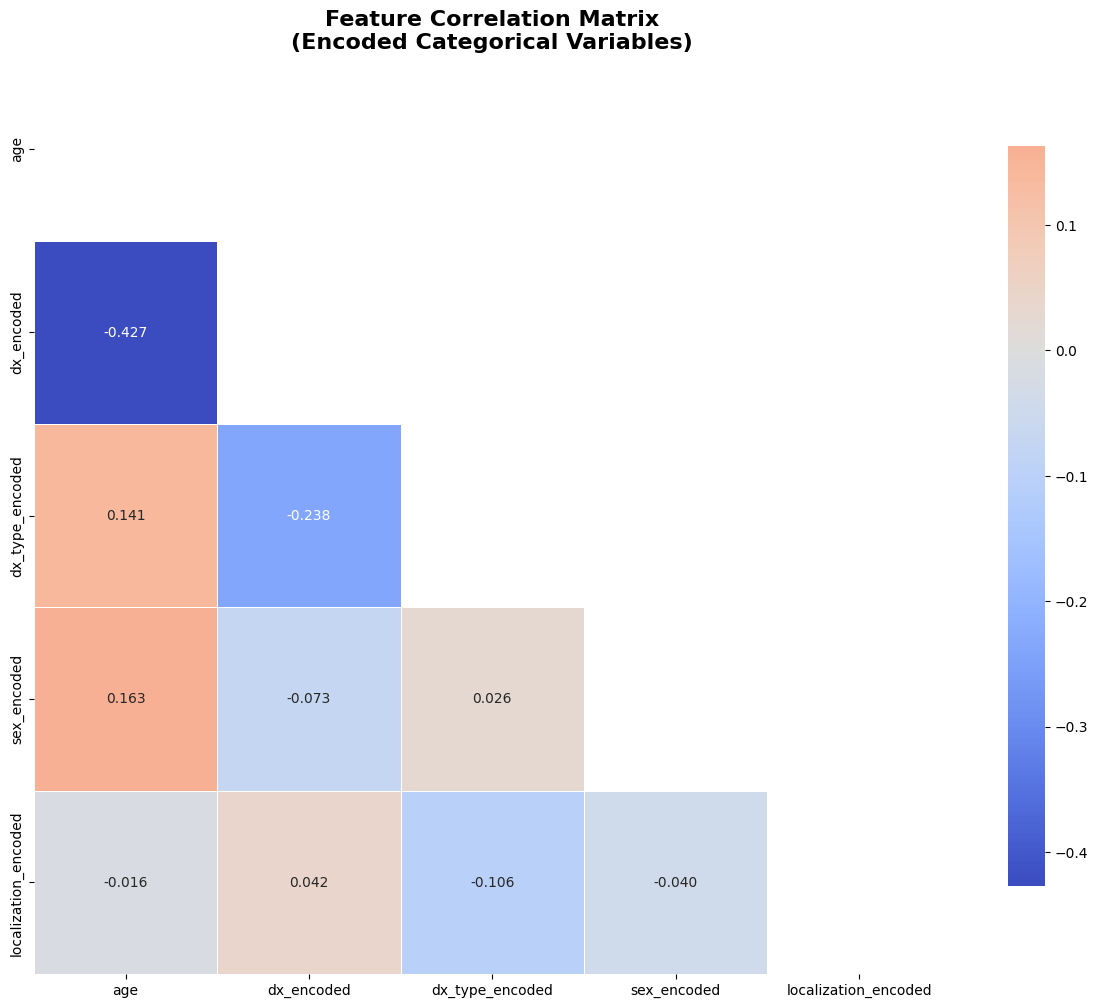

Feature Correlation Analysis:
Strong correlations found (|correlation| > 0.3):


,Feature 1,Feature 2,Correlation
0,age,dx_encoded,-0.426755



Correlations with target variable (dx):
age: -0.427
dx_type_encoded: -0.238
sex_encoded: -0.073
localization_encoded: 0.042


In [8]:
# Create encoded versions of categorical variables for correlation analysis
df_encoded = df.copy()

# Label encode categorical variables
label_encoders = {}
categorical_columns = ['dx', 'dx_type', 'sex', 'localization']

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Select numerical and encoded columns for correlation
corr_columns = ['age'] + [col + '_encoded' for col in categorical_columns]
correlation_matrix = df_encoded[corr_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Feature Correlation Matrix\n(Encoded Categorical Variables)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../Results/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze specific correlations
print("Feature Correlation Analysis:")
print("="*50)

# Find strong correlations (> 0.5 or < -0.5)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # Lowered threshold to capture meaningful relationships
            strong_correlations.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
    print("Strong correlations found (|correlation| > 0.3):")
    display(strong_corr_df)
else:
    print("No strong correlations found (|correlation| > 0.3)")

# Correlation with target variable (dx)
target_correlations = correlation_matrix['dx_encoded'].drop('dx_encoded').sort_values(key=abs, ascending=False)
print(f"\nCorrelations with target variable (dx):")
for feature, corr in target_correlations.items():
    print(f"{feature}: {corr:.3f}")

## Step 9: Age Distribution Analysis

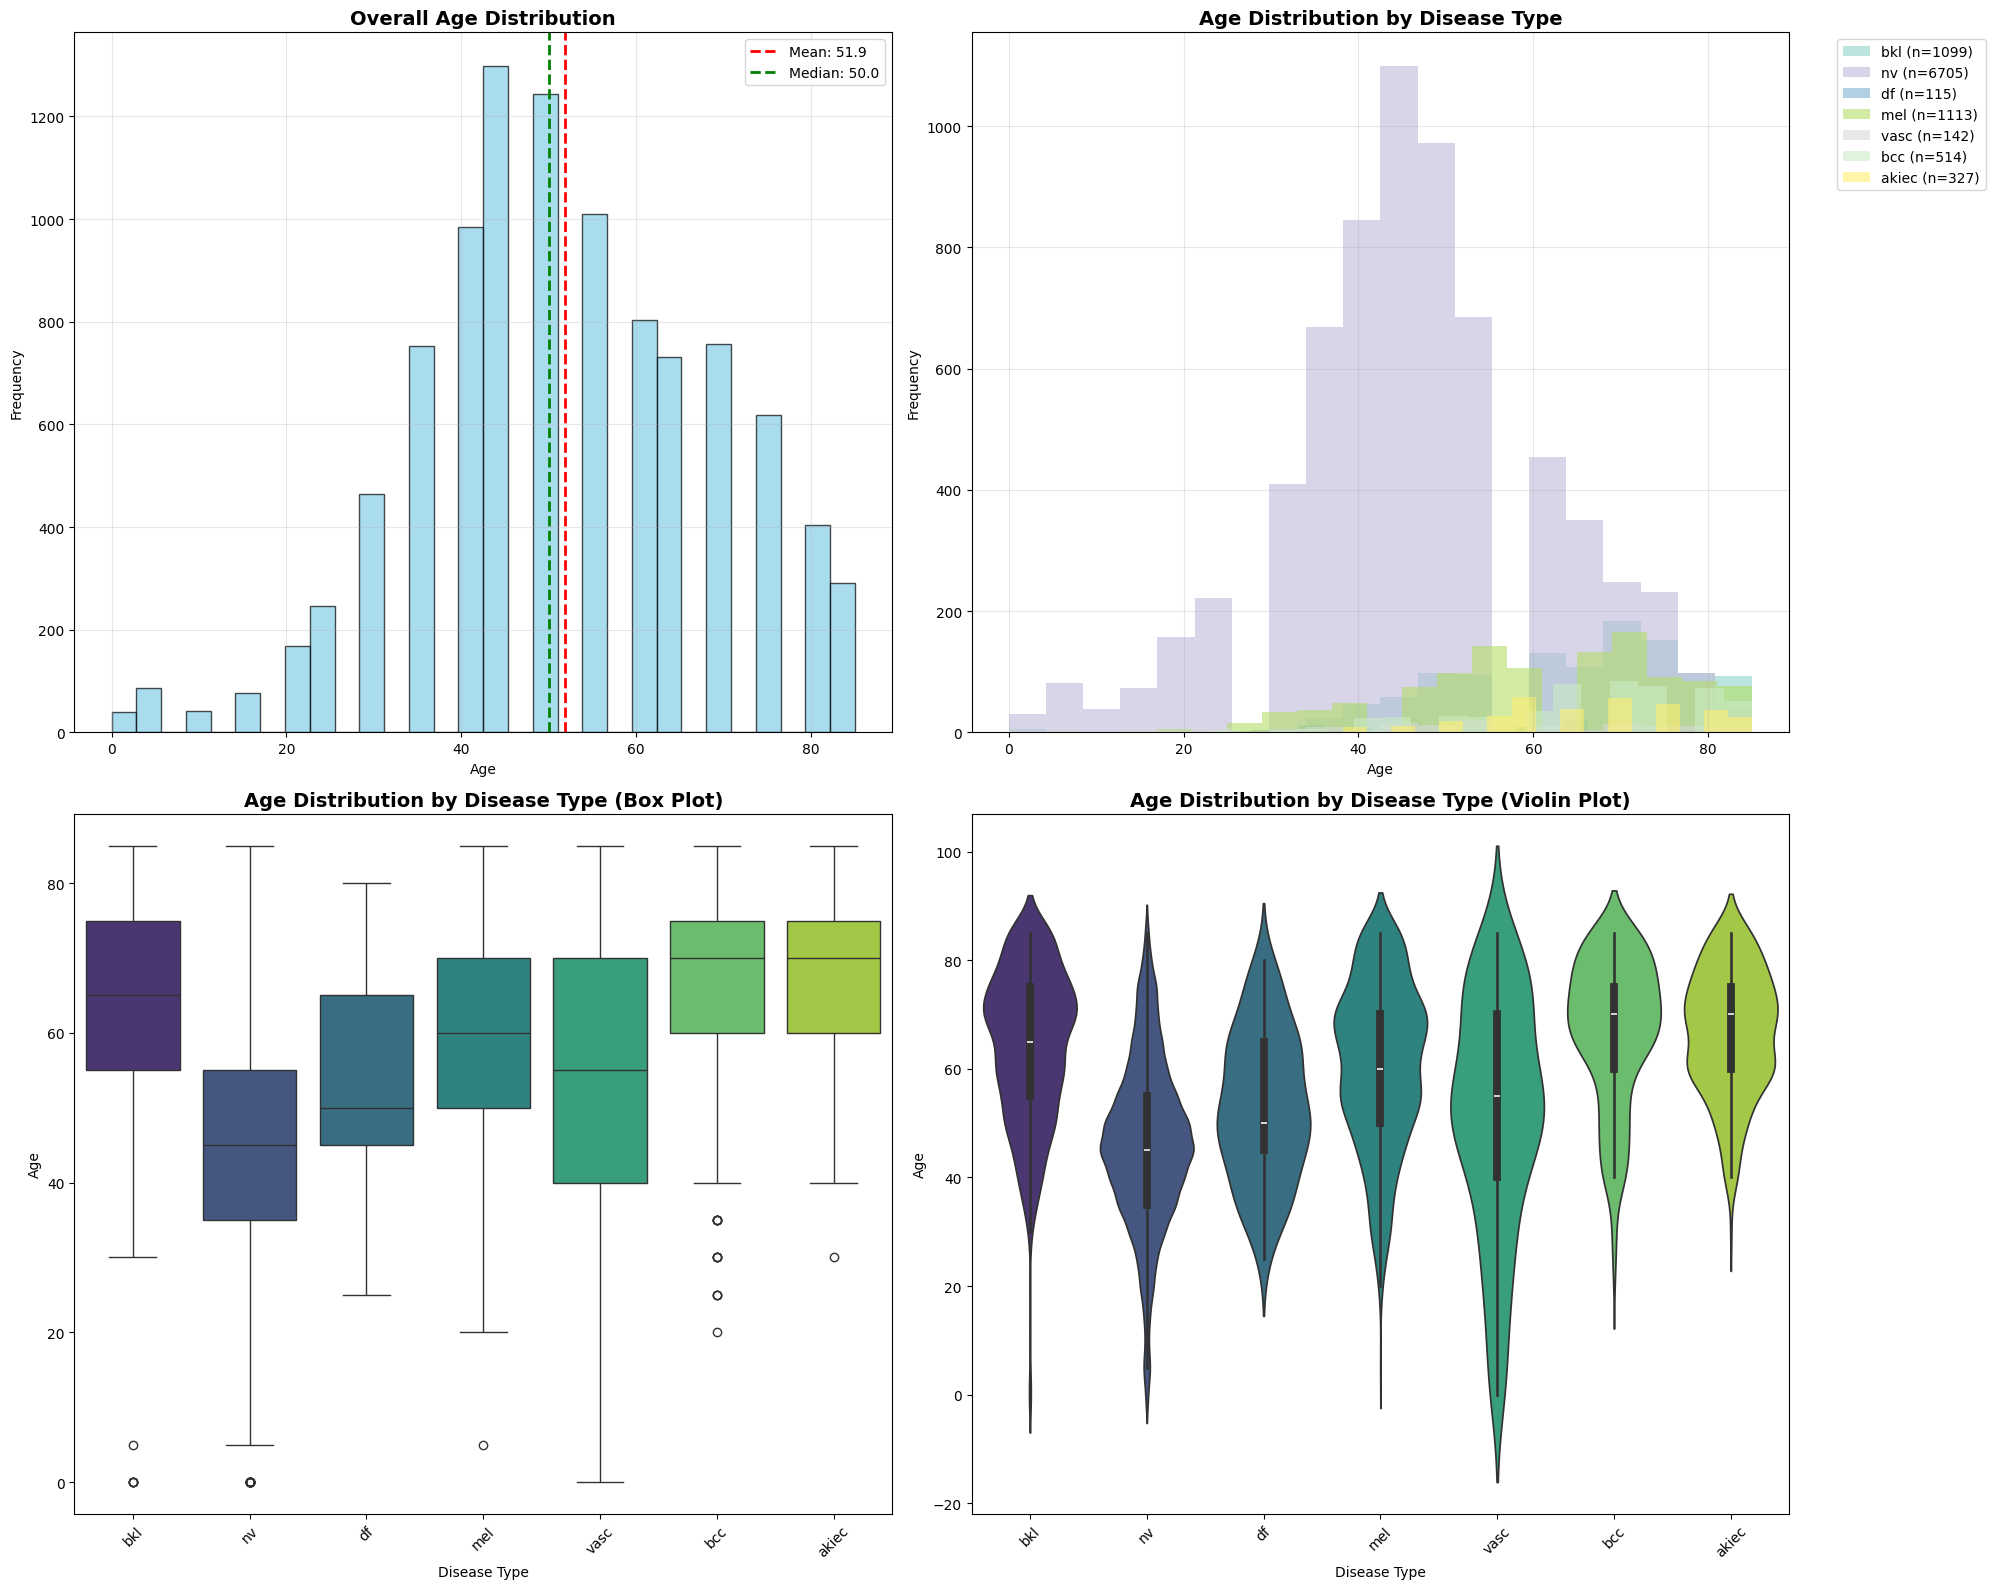

Age Statistics by Disease Type:


,count,mean,median,std,min,max
dx,,,,,,
akiec,327,66.53,70.0,11.48,30.0,85.0
bcc,514,66.83,70.0,13.66,20.0,85.0
bkl,1099,64.15,65.0,14.12,0.0,85.0
df,115,53.04,50.0,13.55,25.0,80.0
mel,1113,60.66,60.0,15.18,5.0,85.0
nv,6705,46.50,45.0,15.13,0.0,85.0
vasc,142,51.37,55.0,21.64,0.0,85.0



Age Group Distribution by Disease Type (%):


dx,akiec,bcc,bkl,df,mel,nv,vasc
age_group,,,,,,,
0-20,0.0,0.2,0.1,0.0,0.6,5.3,9.4
21-40,3.1,6.8,6.9,23.5,12.1,32.1,15.2
41-60,34.9,22.0,34.9,47.0,37.7,48.1,42.8
61-80,54.4,60.9,49.5,29.6,42.7,13.9,29.0
81-100,7.6,10.1,8.5,0.0,6.8,0.6,3.6


In [9]:
# Age distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Overall age distribution
axes[0,0].hist(df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
axes[0,0].axvline(df['age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["age"].median():.1f}')
axes[0,0].set_title('Overall Age Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Age distribution by disease type
disease_types = df['dx'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(disease_types)))

for i, disease in enumerate(disease_types):
    disease_ages = df[df['dx'] == disease]['age']
    axes[0,1].hist(disease_ages, alpha=0.6, label=f'{disease} (n={len(disease_ages)})', 
                   color=colors[i], bins=20)

axes[0,1].set_title('Age Distribution by Disease Type', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(True, alpha=0.3)

# Box plot of age by disease type
sns.boxplot(data=df, x='dx', y='age', ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Age Distribution by Disease Type (Box Plot)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Disease Type')
axes[1,0].set_ylabel('Age')
axes[1,0].tick_params(axis='x', rotation=45)

# Violin plot for detailed distribution
sns.violinplot(data=df, x='dx', y='age', ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Age Distribution by Disease Type (Violin Plot)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Disease Type')
axes[1,1].set_ylabel('Age')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../Results/age_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Age statistics by disease type
print("Age Statistics by Disease Type:")
print("="*60)
age_stats = df.groupby('dx')['age'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
display(age_stats)

# Create age groups for better analysis
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], 
                        labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Age group distribution by disease
age_disease_crosstab = pd.crosstab(df['age_group'], df['dx'], normalize='columns') * 100
print(f"\nAge Group Distribution by Disease Type (%):")
display(age_disease_crosstab.round(1))

## Step 10: Gender Distribution Analysis

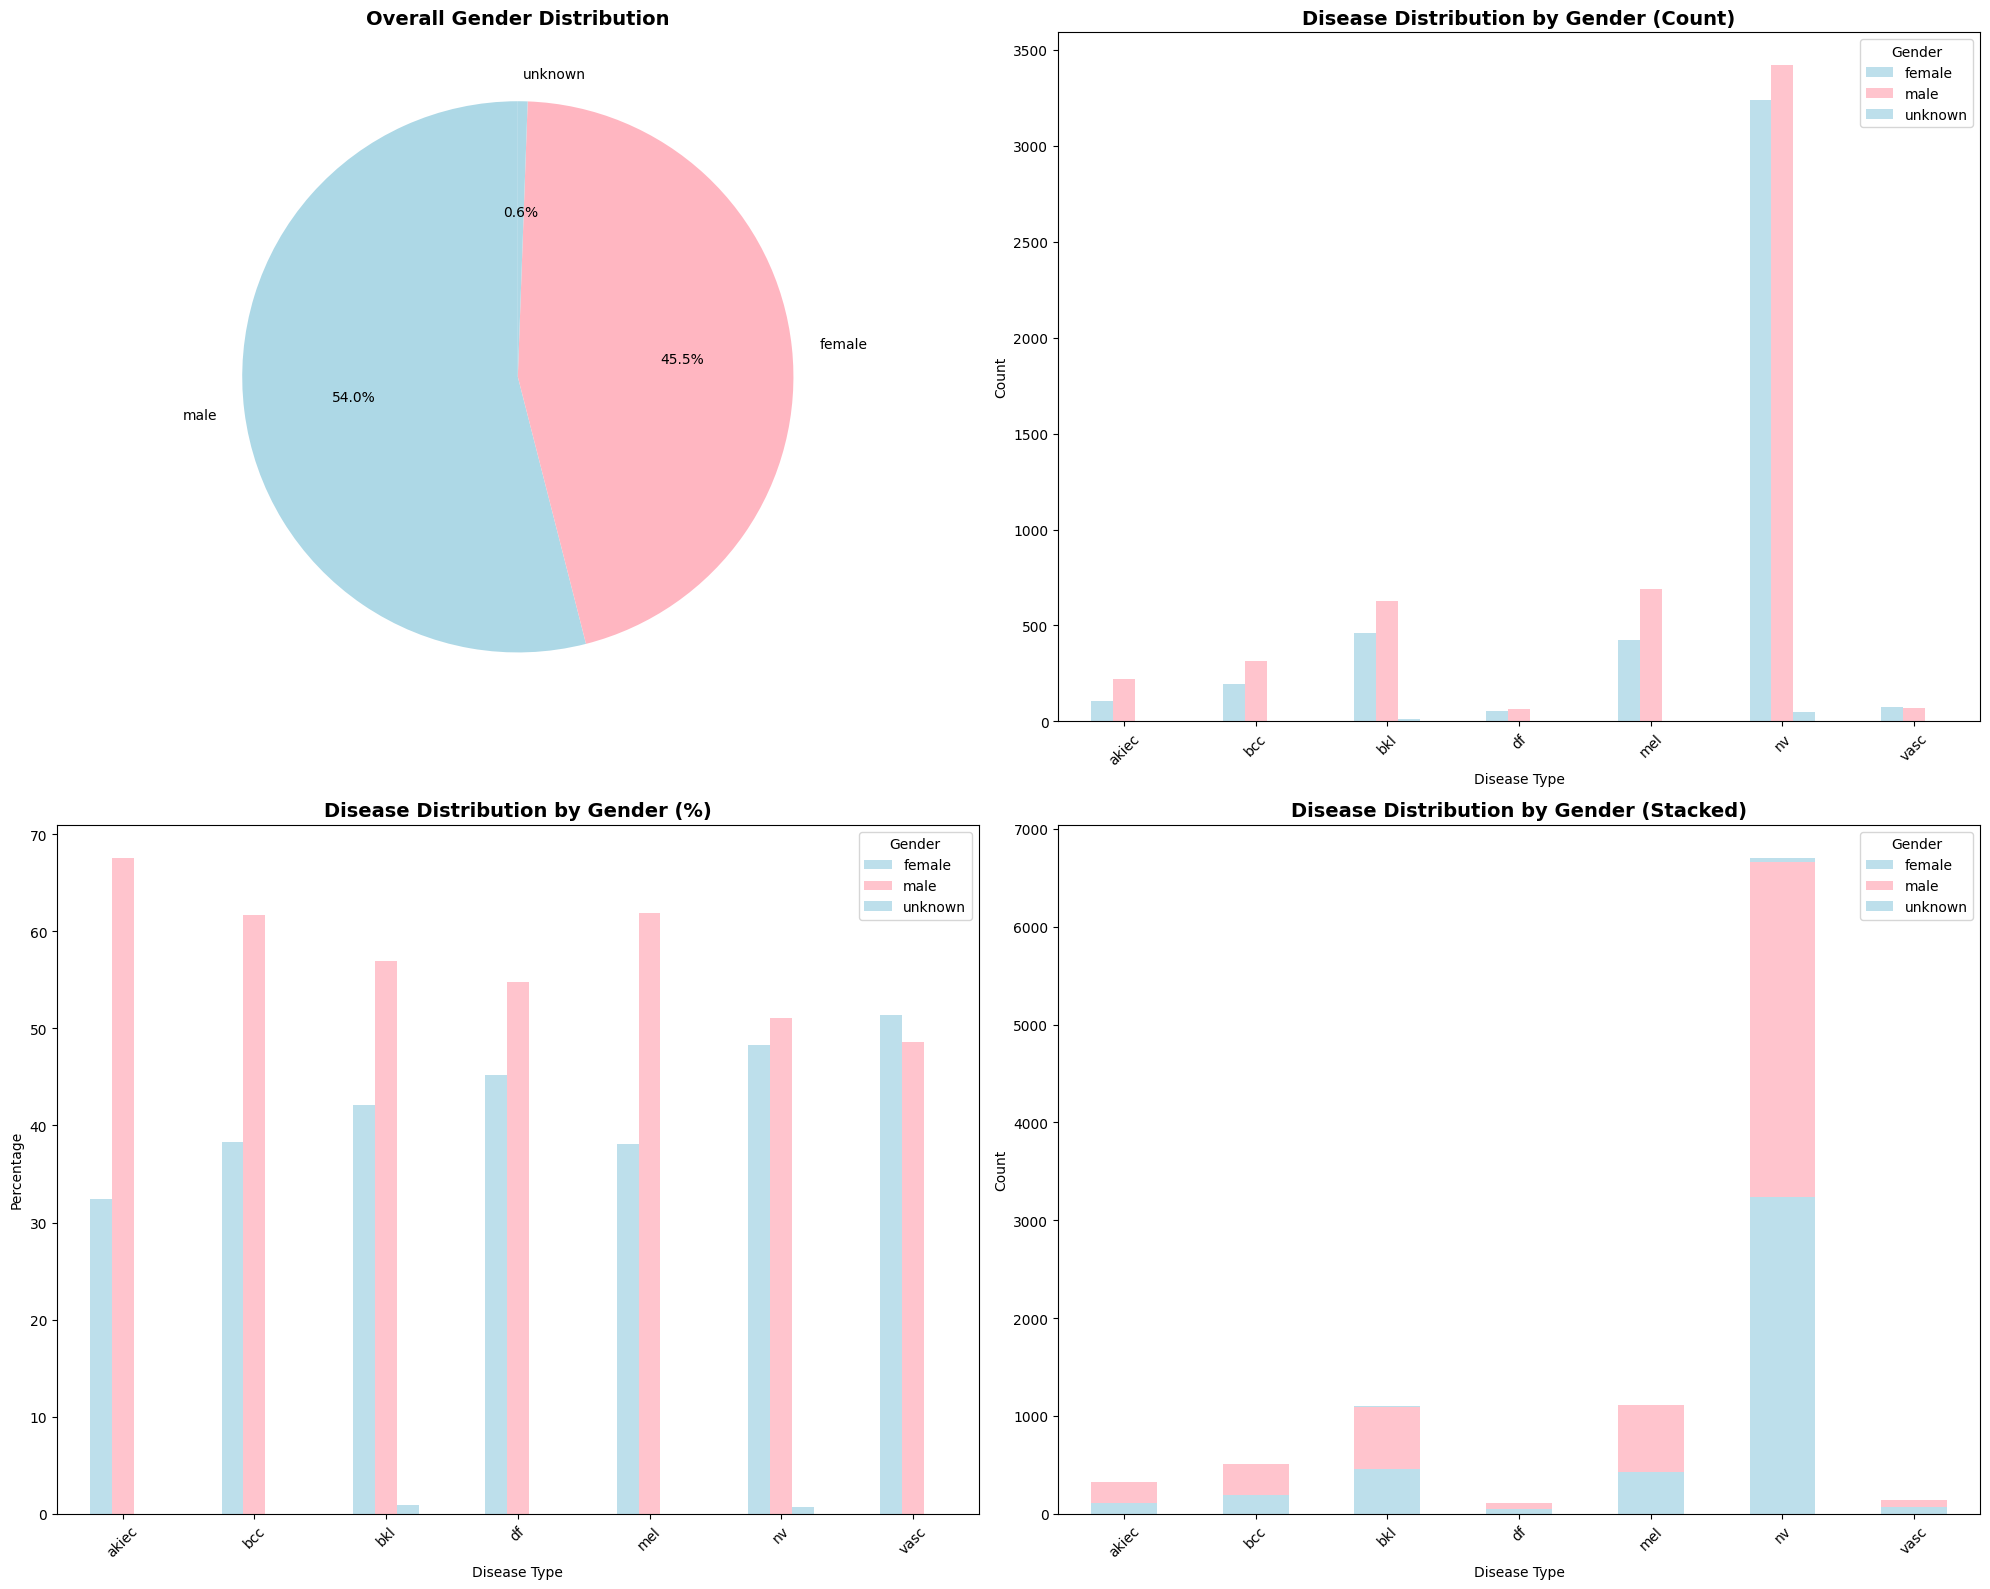

Gender Distribution Analysis:
Overall gender distribution:
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

Gender percentages:
sex
male       54.0
female     45.5
unknown     0.6
Name: count, dtype: float64

Gender distribution by disease type:


sex,female,male,unknown
dx,,,
akiec,106,221,0
bcc,197,317,0
bkl,463,626,10
df,52,63,0
mel,424,689,0
nv,3237,3421,47
vasc,73,69,0



Gender percentage by disease type:


sex,female,male,unknown
dx,,,
akiec,32.4,67.6,0.0
bcc,38.3,61.7,0.0
bkl,42.1,57.0,0.9
df,45.2,54.8,0.0
mel,38.1,61.9,0.0
nv,48.3,51.0,0.7
vasc,51.4,48.6,0.0



Age statistics by gender:


,count,mean,median,std,min,max
sex,,,,,,
female,4552,48.71,50.0,16.15,0.0,85.0
male,5406,54.54,55.0,17.15,0.0,85.0
unknown,57,47.81,50.0,10.13,0.0,60.0


In [10]:
# Gender distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Overall gender distribution
gender_counts = df['sex'].value_counts()
colors = ['lightblue', 'lightpink']

axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Overall Gender Distribution', fontsize=14, fontweight='bold')

# Gender vs Disease Type (Count)
gender_disease = pd.crosstab(df['dx'], df['sex'])
gender_disease.plot(kind='bar', ax=axes[0,1], color=colors, alpha=0.8)
axes[0,1].set_title('Disease Distribution by Gender (Count)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Disease Type')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(title='Gender')
axes[0,1].tick_params(axis='x', rotation=45)

# Gender vs Disease Type (Percentage)
gender_disease_pct = pd.crosstab(df['dx'], df['sex'], normalize='index') * 100
gender_disease_pct.plot(kind='bar', ax=axes[1,0], color=colors, alpha=0.8)
axes[1,0].set_title('Disease Distribution by Gender (%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Disease Type')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(title='Gender')
axes[1,0].tick_params(axis='x', rotation=45)

# Stacked bar chart
gender_disease.plot(kind='bar', stacked=True, ax=axes[1,1], color=colors, alpha=0.8)
axes[1,1].set_title('Disease Distribution by Gender (Stacked)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Disease Type')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(title='Gender')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../Results/gender_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Gender statistics
print("Gender Distribution Analysis:")
print("="*50)
print("Overall gender distribution:")
print(gender_counts)
print(f"\nGender percentages:")
print((gender_counts / len(df) * 100).round(1))

print(f"\nGender distribution by disease type:")
display(gender_disease)

print(f"\nGender percentage by disease type:")
display(gender_disease_pct.round(1))

# Age by gender analysis
print(f"\nAge statistics by gender:")
age_by_gender = df.groupby('sex')['age'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
display(age_by_gender)

## Additional Analysis: Localization and Diagnosis Type

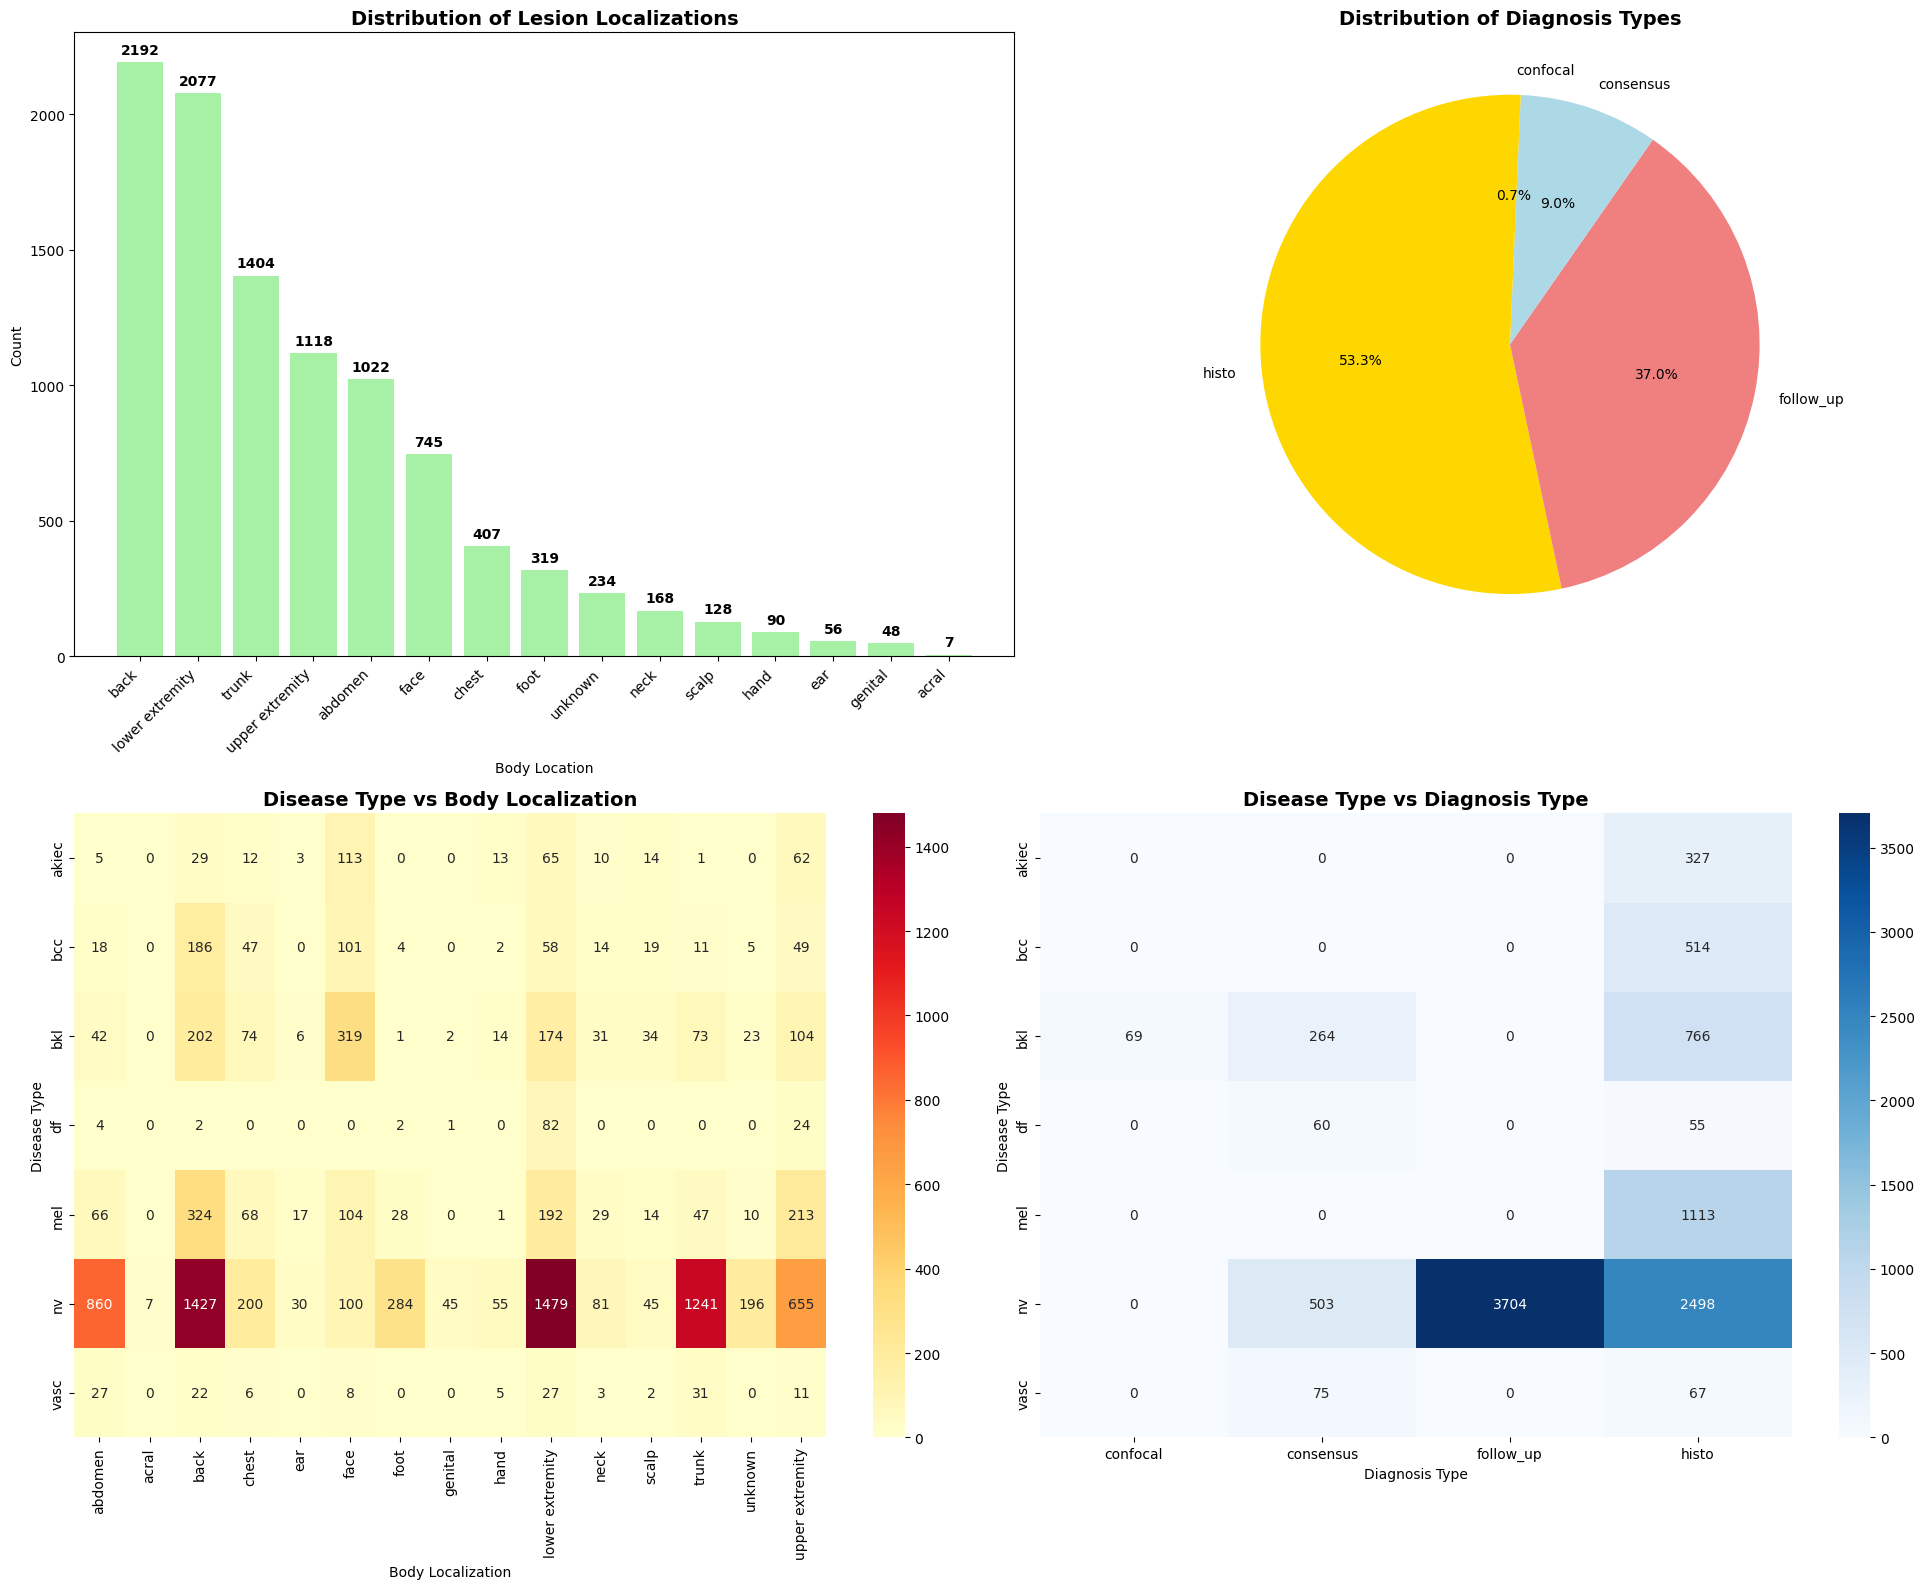

Localization Analysis:
Most common body locations:
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
Name: count, dtype: int64

Diagnosis type distribution:
dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

Top disease-localization combinations:
dx   localization   
nv   lower extremity    1479
     back               1427
     trunk              1241
     abdomen             860
     upper extremity     655
mel  back                324
bkl  face                319
nv   foot                284
mel  upper extremity     213
bkl  back                202
dtype: int64


In [11]:
# Localization analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Body localization distribution
localization_counts = df['localization'].value_counts()
axes[0,0].bar(range(len(localization_counts)), localization_counts.values, color='lightgreen', alpha=0.8)
axes[0,0].set_title('Distribution of Lesion Localizations', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Body Location')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticks(range(len(localization_counts)))
axes[0,0].set_xticklabels(localization_counts.index, rotation=45, ha='right')

# Add count labels
for i, v in enumerate(localization_counts.values):
    axes[0,0].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

# Diagnosis type distribution
dx_type_counts = df['dx_type'].value_counts()
axes[0,1].pie(dx_type_counts.values, labels=dx_type_counts.index, autopct='%1.1f%%', 
              startangle=90, colors=['gold', 'lightcoral', 'lightblue'])
axes[0,1].set_title('Distribution of Diagnosis Types', fontsize=14, fontweight='bold')

# Heatmap: Disease vs Localization
disease_loc_crosstab = pd.crosstab(df['dx'], df['localization'])
sns.heatmap(disease_loc_crosstab, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
axes[1,0].set_title('Disease Type vs Body Localization', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Body Localization')
axes[1,0].set_ylabel('Disease Type')

# Heatmap: Disease vs Diagnosis Type
disease_dx_type_crosstab = pd.crosstab(df['dx'], df['dx_type'])
sns.heatmap(disease_dx_type_crosstab, annot=True, fmt='d', ax=axes[1,1], cmap='Blues')
axes[1,1].set_title('Disease Type vs Diagnosis Type', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Diagnosis Type')
axes[1,1].set_ylabel('Disease Type')

plt.tight_layout()
plt.savefig('../Results/localization_diagnosis_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Localization Analysis:")
print("="*50)
print("Most common body locations:")
print(localization_counts.head())

print(f"\nDiagnosis type distribution:")
print(dx_type_counts)

print(f"\nTop disease-localization combinations:")
disease_loc_combinations = df.groupby(['dx', 'localization']).size().sort_values(ascending=False).head(10)
print(disease_loc_combinations)

## Summary and Insights

### Key Findings from Exploratory Data Analysis:

In [12]:
# Generate comprehensive summary report
print("🔍 COMPREHENSIVE EDA SUMMARY REPORT")
print("="*60)

print(f"📊 DATASET OVERVIEW:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Total features: {len(df.columns)}")
print(f"   • Data quality: {((len(df) - df.isnull().sum().sum()) / (len(df) * len(df.columns)) * 100):.1f}% complete")

print(f"\n🎯 TARGET VARIABLE (Disease Types):")
dx_counts = df['dx'].value_counts()
print(f"   • Total disease categories: {len(dx_counts)}")
print(f"   • Most common: {dx_counts.index[0]} ({dx_counts.iloc[0]:,} cases, {dx_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"   • Least common: {dx_counts.index[-1]} ({dx_counts.iloc[-1]:,} cases, {dx_counts.iloc[-1]/len(df)*100:.1f}%)")
print(f"   • Class imbalance ratio: {dx_counts.iloc[0]/dx_counts.iloc[-1]:.1f}:1")

print(f"\n👥 DEMOGRAPHIC INSIGHTS:")
print(f"   • Age range: {df['age'].min():.0f} - {df['age'].max():.0f} years")
print(f"   • Average age: {df['age'].mean():.1f} ± {df['age'].std():.1f} years")
gender_dist = df['sex'].value_counts()
print(f"   • Gender distribution: {gender_dist.iloc[0]:,} {gender_dist.index[0]} ({gender_dist.iloc[0]/len(df)*100:.1f}%), {gender_dist.iloc[1]:,} {gender_dist.index[1]} ({gender_dist.iloc[1]/len(df)*100:.1f}%)")

print(f"\n📍 LOCALIZATION INSIGHTS:")
loc_counts = df['localization'].value_counts()
print(f"   • Total body locations: {len(loc_counts)}")
print(f"   • Most common location: {loc_counts.index[0]} ({loc_counts.iloc[0]:,} cases)")
print(f"   • Least common location: {loc_counts.index[-1]} ({loc_counts.iloc[-1]:,} cases)")

print(f"\n🔬 DIAGNOSIS METHOD:")
dx_type_counts = df['dx_type'].value_counts()
for dx_type, count in dx_type_counts.items():
    print(f"   • {dx_type}: {count:,} cases ({count/len(df)*100:.1f}%)")

print(f"\n⚠️  MODELING CONSIDERATIONS:")
imbalance_ratio = dx_counts.iloc[0] / dx_counts.iloc[-1]
if imbalance_ratio > 10:
    print(f"   • CRITICAL: Severe class imbalance detected (ratio: {imbalance_ratio:.1f}:1)")
    print(f"   • Recommendation: Use SMOTE, class weights, or stratified sampling")
elif imbalance_ratio > 3:
    print(f"   • WARNING: Moderate class imbalance detected (ratio: {imbalance_ratio:.1f}:1)")
    print(f"   • Recommendation: Consider class weights or stratified sampling")
else:
    print(f"   • INFO: Relatively balanced dataset (ratio: {imbalance_ratio:.1f}:1)")

print(f"\n📈 FEATURE ENGINEERING OPPORTUNITIES:")
print(f"   • Age groups: Created categorical age ranges for better modeling")
print(f"   • Encoded categorical variables for correlation analysis")
print(f"   • Consider interaction features between age, gender, and localization")

print(f"\n💾 FILES SAVED:")
saved_files = [
    'disease_distribution.png',
    'class_imbalance_analysis.png', 
    'correlation_heatmap.png',
    'age_distribution_analysis.png',
    'gender_distribution_analysis.png',
    'localization_diagnosis_analysis.png'
]
for file in saved_files:
    print(f"   • ../Results/{file}")

print(f"\n✅ EDA COMPLETED SUCCESSFULLY!")
print("="*60)

🔍 COMPREHENSIVE EDA SUMMARY REPORT
📊 DATASET OVERVIEW:
   • Total samples: 10,015
   • Total features: 8
   • Data quality: 12.5% complete

🎯 TARGET VARIABLE (Disease Types):
   • Total disease categories: 7
   • Most common: nv (6,705 cases, 66.9%)
   • Least common: df (115 cases, 1.1%)
   • Class imbalance ratio: 58.3:1

👥 DEMOGRAPHIC INSIGHTS:
   • Age range: 0 - 85 years
   • Average age: 51.9 ± 16.9 years
   • Gender distribution: 5,406 male (54.0%), 4,552 female (45.5%)

📍 LOCALIZATION INSIGHTS:
   • Total body locations: 15
   • Most common location: back (2,192 cases)
   • Least common location: acral (7 cases)

🔬 DIAGNOSIS METHOD:
   • histo: 5,340 cases (53.3%)
   • follow_up: 3,704 cases (37.0%)
   • consensus: 902 cases (9.0%)
   • confocal: 69 cases (0.7%)

⚠️  MODELING CONSIDERATIONS:
   • CRITICAL: Severe class imbalance detected (ratio: 58.3:1)
   • Recommendation: Use SMOTE, class weights, or stratified sampling

📈 FEATURE ENGINEERING OPPORTUNITIES:
   • Age groups: C